# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data 


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [1]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [2]:
!pip install nltk


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [6]:
train.isna().sum()

id             0
keyword       44
location    1760
text           0
target         0
dtype: int64

In [7]:
test.isna().sum()

id            0
keyword      17
location    773
text          0
target        0
dtype: int64

In [8]:
train.fillna('', inplace=True)
test.fillna('', inplace=True)

In [9]:
train.isna().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [10]:
test.isna().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?


In [11]:
train.target.value_counts()

0    3024
1    2305
Name: target, dtype: int64

In [12]:
print(train[train.target == 0].shape[0] / train.shape[0],'% - нули. Нет сильного дисбаланса')

0.5674610621129668 % - нули. Нет сильного дисбаланса


2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [13]:
train[train['keyword'] != '']['keyword'].value_counts().nlargest(10).index.to_numpy()

array(['damage', 'siren', 'wreckage', 'fatalities', 'deluge', 'twister',
       'fatality', 'harm', 'emergency', 'nuclear%20reactor'], dtype=object)

In [14]:
popular_keywords = train[train['keyword'] != '']['keyword'].value_counts().nlargest(10).index.to_numpy()

In [15]:
filtered_df = train[train['keyword'].isin(popular_keywords)]
filtered_df

,id,keyword,location,text,target
5130,7317,nuclear%20reactor,"Denver, CO",Nuclear #Solar Power #Japanese #Fukushima Reac...,1
2004,2880,damage,Austin | San Diego,@swb1192 if the NDA is written to damage your ...,0
6135,8753,siren,"Tampa, FL",A demoness with the voice of an angel. Like a ...,0
3165,4543,emergency,,@chowtaxis of Newport a big thanks for the eme...,1
4139,5886,harm,"Massachusetts, USA",@tareksocal I think a lot of celebrities have ...,0
...,...,...,...,...,...
5134,7323,nuclear%20reactor,Paris (France),Magnetic and electrostatic nuclear fusion reac...,0
3645,5194,fatalities,San Francisco,'Motordom' lobbied to change our language arou...,0
3152,4526,emergency,Adelaide,Myanmar floods: Childfund https://t.co/pQHQ4Jn...,1
7513,10746,wreckage,,KUALA LUMPUR (Reuters) - A piece of a wing tha...,1


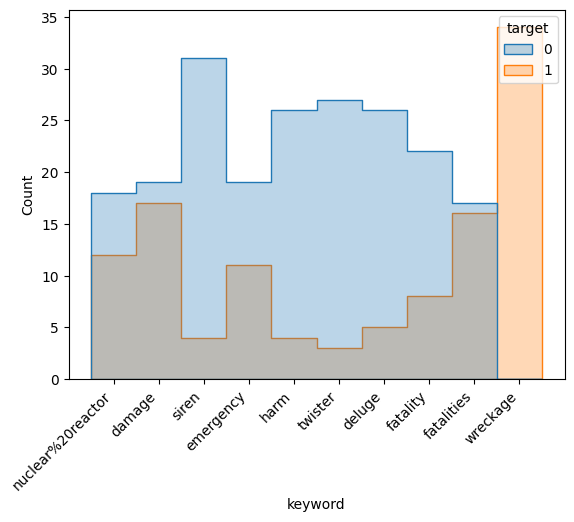

<Figure size 1600x600 with 0 Axes>

In [16]:
sns.histplot(data = filtered_df, x = 'keyword', alpha = 0.3, hue = 'target',  element="step")
plt.xticks(rotation=45, ha='right')
plt.figure(figsize=(16, 6))
plt.show()

**Выводы**: Видим, что при wreckage - обломках, все случаи про настоящую катастрофу, причем их больше всего

При twister можем увидеть наименьшее кол-во настоящих катастроф. 

При siren наибольшее количество ложных новостей

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [17]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [18]:
train['text'] = train['keyword'] + ' ' + train['location'] + ' ' + train['text']
train

,id,keyword,location,text,target
1186,1707,bridge%20collapse,,bridge%20collapse Ashes 2015: AustraliaÛªs c...,0
4071,5789,hail,"Carol Stream, Illinois","hail Carol Stream, Illinois GREAT MICHIGAN TEC...",1
5461,7789,police,Houston,police Houston CNN: Tennessee movie theater s...,1
5787,8257,rioting,,rioting Still rioting in a couple of hours le...,1
7445,10656,wounds,Lake Highlands,wounds Lake Highlands Crack in the path where ...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,obliteration Merica! @Eganator2000 There aren'...,0
5390,7691,panic,,panic just had a panic attack bc I don't have...,0
860,1242,blood,,blood Omron HEM-712C Automatic Blood Pressure...,0
7603,10862,,,Officials say a quarantine is in place at an...,1


In [19]:
train.drop(['id', 'keyword', 'location'], axis = 1, inplace=True)
train.head()

,text,target
1186,bridge%20collapse Ashes 2015: AustraliaÛªs c...,0
4071,"hail Carol Stream, Illinois GREAT MICHIGAN TEC...",1
5461,police Houston CNN: Tennessee movie theater s...,1
5787,rioting Still rioting in a couple of hours le...,1
7445,wounds Lake Highlands Crack in the path where ...,0


In [20]:
train.loc[[6590, 7122, 2769]]

,text,target
6590,"survivors Marietta, GA Stemming from my #Cubs ...",1
7122,violent%20storm If you were the NWS wth a rot...,1
2769,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...,0


In [21]:
test['text'] = test['keyword'] + ' ' + test['location'] + ' ' + test['text']
test

,id,keyword,location,text,target
2644,3796,destruction,,destruction So you have a new weapon that can...,1
2227,3185,deluge,,deluge The f$&amp;@ing things I do for #GISHW...,0
5448,7769,police,UK,police UK DT @georgegalloway: RT @Galloway4May...,1
132,191,aftershock,,aftershock Aftershock back to school kick off...,0
6845,9810,trauma,"Montgomery County, MD","trauma Montgomery County, MD in response to tr...",0
...,...,...,...,...,...
4307,6115,hellfire,"570 Vanderbilt; Brooklyn, NY","hellfire 570 Vanderbilt; Brooklyn, NY New cock...",0
3375,4833,evacuation,USA,evacuation USA Bend Post Office roofers cut ga...,1
1710,2466,collided,,collided Monsoon flooding - Monsoon rains hav...,1
4898,6973,massacre,Ireland,massacre Ireland Remember this was a massacre ...,1


In [22]:
test.drop(['id', 'keyword', 'location'], axis = 1, inplace=True)
test.head()

,text,target
2644,destruction So you have a new weapon that can...,1
2227,deluge The f$&amp;@ing things I do for #GISHW...,0
5448,police UK DT @georgegalloway: RT @Galloway4May...,1
132,aftershock Aftershock back to school kick off...,0
6845,"trauma Montgomery County, MD in response to tr...",0


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vec = CountVectorizer(token_pattern = '[a-zA-Z0-9$&+,:;=?@#|<>.^*()%!-]+')
X = cnt_vec.fit_transform(train['text'])

In [24]:
X.shape

(5329, 22796)

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [25]:
def contains_digit(s: str) -> bool:
    # Проверка, содержит ли слово цифры
    for i in s:
        if i.isdigit():
            return True
    return False

def contains_punctuation(s: str) -> bool:
    for i in s:
        if i in punctuation:
            return True
    return False

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    return s.startswith('#') and len(s) > 1

def is_mention(s: str) -> bool:
    # Проверка, является ли слово упоминанием
    return s.startswith('@') and len(s) > 1

def investigate_vocabulary(vocabulary):
    d = 0
    p = 0
    h = 0
    m = 0
    for word in vocabulary:
        if contains_digit(word):
            d += 1
        if contains_punctuation(word):
            p += 1
        if is_hashtag(word):
            h += 1
        if is_mention(word):
            m += 1
        
    print('With digit:      ', d
          )
    print('With punctuation:', p
          )
    print('Hashtags:        ', h
          )
    print('Mentions:        ', m
          )




In [26]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit:       2
With punctuation: 7
Hashtags:         1
Mentions:         3


In [27]:
cnt_vec.vocabulary_ 

{'bridge%20collapse': 6637,
 'ashes': 5596,
 '2015:': 2231,
 'australia': 5729,
 's': 18269,
 'collapse': 7659,
 'at': 5639,
 'trent': 20746,
 'bridge': 6636,
 'among': 5281,
 'worst': 22192,
 'in': 12332,
 'history:': 11786,
 'england': 9567,
 'bundled': 6790,
 'out': 16064,
 'for': 10448,
 '60': 2693,
 '...': 1803,
 'http:': 12001,
 't.co': 19987,
 't5trhjuau0': 19998,
 'hail': 11370,
 'carol': 7092,
 'stream,': 19641,
 'illinois': 12268,
 'great': 11149,
 'michigan': 14612,
 'technique': 20147,
 'camp': 6987,
 'b1g': 5827,
 'thanks': 20274,
 'to': 20518,
 '@bmurph1019': 3370,
 '@hail': 3780,
 'youtsey': 22604,
 '.': 1801,
 '@termn8r13': 4568,
 '#goblue': 539,
 '#wrestleon': 1468,
 'oaskgki6qj': 15691,
 'police': 16764,
 'houston': 11968,
 'cnn:': 7597,
 'tennessee': 20187,
 'movie': 14980,
 'theater': 20291,
 'shooting': 18833,
 'suspect': 19893,
 'killed': 13226,
 'by': 6870,
 'di8elzswnr': 8724,
 'rioting': 17986,
 'still': 19574,
 'a': 4782,
 'couple': 7986,
 'of': 15759,
 'hours

In [28]:
investigate_vocabulary(cnt_vec.vocabulary_ )

With digit:       4095
With punctuation: 8403
Hashtags:         1490
Mentions:         1618


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [29]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [30]:
tw = TweetTokenizer()
v = CountVectorizer(tokenizer=tw.tokenize)
Xnew = v.fit_transform(train['text'])

In [31]:
investigate_vocabulary(v.vocabulary_)

With digit:       3939
With punctuation: 7338
Hashtags:         1469
Mentions:         1678


**Сравнение:** Видим, что новый токенайзер начал замечать больше.
- Так, например, слов с пунктуацией стало в 2 раза больше, чем было.
- Остальные значения также немного прибавилось

Технология другая, полноценно начал считывать ссылки, некоторые слова, наоборот, начал разделять.

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer



In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vadimkuznetsov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
def contains_only_latin_letters(s: str) -> bool:
    # Проверка, содержит ли слово только латинские буквы
    return all(char.isalpha() and char.isascii() for char in s)

def is_emoji(s: str) -> bool:
    return contains_punctuation(s) and ('(' in s or ')' in s)

def is_hashtag(s: str) -> bool:
    return s.startswith('#') and len(s) > 1 and contains_only_latin_letters(s[1:])

def custom_tokenizer(s: str) -> List[str]:    
    s = s.lower()
    l = TweetTokenizer().tokenize(s)
    ar = []
    for i in l:
        if (contains_only_latin_letters(i) or is_emoji(i) or is_hashtag(i)) and i not in stopwords.words('english'):
            ar.append(i)
    stemmer = SnowballStemmer('english')
    return [stemmer.stem(i) for i in ar]
    
    

In [35]:
custom_tokenizer('She LOVES painting :-) #art')

['love', 'paint', ':-)', '#art']

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [37]:
train[:10]

,text,target
1186,bridge%20collapse Ashes 2015: AustraliaÛªs c...,0
4071,"hail Carol Stream, Illinois GREAT MICHIGAN TEC...",1
5461,police Houston CNN: Tennessee movie theater s...,1
5787,rioting Still rioting in a couple of hours le...,1
7445,wounds Lake Highlands Crack in the path where ...,0
151,airplane%20accident Somewhere Out There Expert...,1
915,bloody Isolated City In World Perth 'I came to...,1
1305,burning @JohnsonTionne except idk them?? it's...,0
2570,destroy he/him or she/her (ask) destroy the house,0
7399,"wounded Maracay y Nirgua, Venezuela Police Off...",1


In [38]:
cv3 = CountVectorizer(tokenizer=custom_tokenizer)
texts = cv3.fit_transform(train[:10]['text'])
cv3.vocabulary_

{'bridg': 16,
 'ash': 9,
 'australia': 11,
 'collaps': 25,
 'trent': 87,
 'among': 8,
 'worst': 92,
 'histori': 44,
 'england': 32,
 'bundl': 17,
 'hail': 42,
 'carol': 21,
 'stream': 80,
 'illinoi': 49,
 'great': 41,
 'michigan': 59,
 'techniqu': 83,
 'camp': 20,
 'thank': 85,
 '#goblu': 0,
 '#wrestleon': 2,
 'polic': 67,
 'houston': 47,
 'cnn': 24,
 'tennesse': 84,
 'movi': 61,
 'theater': 86,
 'shoot': 74,
 'suspect': 82,
 'kill': 53,
 'riot': 72,
 'still': 79,
 'coupl': 26,
 'hour': 45,
 'left': 57,
 'class': 23,
 'wound': 93,
 'lake': 56,
 'highland': 43,
 'crack': 27,
 'path': 65,
 'wipe': 90,
 'morn': 60,
 'beach': 12,
 'run': 73,
 'surfac': 81,
 'elbow': 31,
 'right': 71,
 'knee': 55,
 'airplan': 7,
 'somewher': 78,
 'expert': 36,
 'franc': 38,
 'begin': 13,
 'examin': 33,
 'debri': 29,
 'found': 37,
 'reunion': 70,
 'island': 51,
 'french': 39,
 'air': 6,
 'accid': 5,
 '#mlb': 1,
 'bloodi': 14,
 'isol': 52,
 'citi': 22,
 'world': 91,
 'perth': 66,
 'came': 19,
 'indian': 50,
 

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.


In [39]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
Xtrain = vectorizer.fit_transform(train['text'])
Xtest = vectorizer.transform(test['text'])

2. Обучите LogisticRegression на полученных признаках.


In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(Xtrain, train['target'])
yTest = lr.predict(Xtest)


3. Посчитайте метрику f1-score на тестовых данных.

In [41]:
from sklearn.metrics import f1_score

f1_score(yTest, test['target'])

0.7533584094572812

## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)
Xtrain = vectorizer.fit_transform(train['text'])
Xtest = vectorizer.transform(test['text'])
lr = LogisticRegression(random_state=42)
lr.fit(Xtrain, train['target'])
yTest = lr.predict(Xtest)
f1_score(yTest, test['target'])

0.7426347971095053

1. **Ответ:** Качество ухудшилось относительно CountVectorizer

2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [44]:
print(Xtest.shape,'- Изначальный размер матрицы тестовой выборки')
print(Xtrain.shape,'- Изначальный размер матрицы обучающей выборки')

(2284, 10483) - Изначальный размер матрицы тестовой выборки
(5329, 10483) - Изначальный размер матрицы обучающей выборки


In [45]:
# 2
vect2 = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9)
Xtrain = vect2.fit_transform(train['text'])
Xtest = vect2.transform(test['text'])
lr = LogisticRegression(random_state=42)
lr.fit(Xtrain, train['target'])
yTest = lr.predict(Xtest)
print('F1 score:', f1_score(yTest, test['target']))

F1 score: 0.7426347971095053


In [46]:
print(Xtest.shape,'- размер матрицы тестовой выборки')
print(Xtrain.shape,'- размер матрицы обучающей выборки')

(2284, 10483) - размер матрицы тестовой выборки
(5329, 10483) - размер матрицы обучающей выборки


2. **Ответ:** Качество осталось прежним, размер также не поменялся

3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [ ]:
# 3
vect3 = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9, min_df=2)
Xtrain = vect3.fit_transform(train['text'])
Xtest = vect3.transform(test['text'])
lr = LogisticRegression(random_state=42)
lr.fit(Xtrain, train['target'])
yTest = lr.predict(Xtest)
print('F1 score:', f1_score(yTest, test['target']))

In [ ]:
print(Xtest.shape,'- размер матрицы тестовой выборки')
print(Xtrain.shape,'- размер матрицы обучающей выборки')

3. **Ответ:** Несильно, но получилось добиться улучшения качества. Также кол-во слов уменьшилось.

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.


In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

Hvnsky = HashingVectorizer(tokenizer = custom_tokenizer, n_features = 5000)
Xtrain = Hvnsky.fit_transform(train['text'])
Xtest = Hvnsky.transform(test['text'])
lr = LogisticRegression(random_state=42)
lr.fit(Xtrain, train['target'])
yTest = lr.predict(Xtest)

print('F1 score:', f1_score(yTest, test['target']))

F1 стал еще меньше

2. Какой из подходов показал самый высокий результат?

2. **Ответ:** Самый высокий результат дал CountVectorizer

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [233]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer, min_df=3)
Xtrain = vectorizer.fit_transform(train['text'])
Xtest = vectorizer.transform(test['text'])

lr = LogisticRegression(random_state=42)
lr.fit(Xtrain, train['target'])
yTest = lr.predict(Xtest)
print('F1 mera:', f1_score(yTest, test['target']))

F1 mera: 0.7548179871520343


In [235]:
from scipy import stats

# Данные
observed = [[15, 5], [7, 8]]

# Расчет статистики хи-квадрат и p-значения
chi2_stat, p_value, _, _ = stats.chi2_contingency(observed)

# Округление статистики хи-квадрат до сотых
chi2_stat = round(chi2_stat, 2)

# Вывод результата
print("Статистика хи-квадрат (χ²):", chi2_stat)


Статистика хи-квадрат (χ²): 1.86
